In [ ]:
import pandas as pd
import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('seaborn-whitegrid')


In [435]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [436]:
data = pd.read_csv('/content/drive/MyDrive/IDS DATASETS/the-hello-dataset-fa22.csv')
data

,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,Muhammad Usman,Male,440,369,2.80,Black,March,77
1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,Umar Wasim,Male,364,469,2.42,Black,October,80
...,...,...,...,...,...,...,...,...
129,M Abubakar Malik,Male,410,349,2.94,Blue,February,65
130,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
131,Shafaqat Ali,Male,424,824,3.07,Black,May,58
132,Ammar Asif,Male,351,423,2.52,Black,December,68


In [566]:
# Print the list of all students whose first name starts with letter the 'H'.

students1 = data['Name'].str.extract('^(H+[A-Za-z]+\s*[A-Za-z]+\s*[A-Za-z]+)',expand=False)
s1 = students1[~pd.isnull(students1)]
print("Following is the list of all students whose first name starts with letter the 'H':\n")
print(s1)

Following is the list of all students whose first name starts with letter the 'H':

9            Hamza Naveed
21            Habib Ullah
22           Hunain Javed
58    Hafiz Malahim Labib
60    Hamna Tariq Saleemi
77                   Hina
78       Hamza Javed Khan
80          Husnain Ahmed
93       Hamayoun Masroor
98          Hussain Afzal
Name: Name, dtype: object


In [567]:
# Print the total number of students who have a three words name (first-middle-surname).

students2 = data['Name'].str.extract('^([A-Za-z]+\s+[A-Za-z]+\s+[A-Za-z]+)',expand=False)
s2 = students2[~pd.isnull(students2)]
print("Total number of students who have a three words name: ", len(s2))

Total number of students who have a three words name:  43


In [569]:
# Print the percentage of students who have a CGPA of 3.0 or above.

students3 = data['CGPA']
num = 0
for i in students3:
  if i>3.0:
    num+=1

total = students3.count()

percent = (num/total)*100

print("Percentage of students who have a CGPA of 3.0 or above: ",'%.2f' % percent)

Percentage of students who have a CGPA of 3.0 or above:  26.12


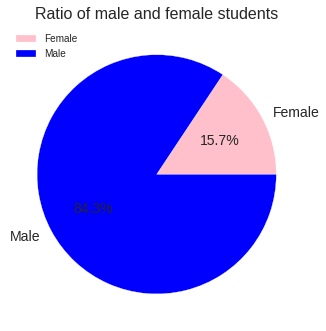

In [570]:
# Plot a pie chart to show the ratio of male and female students.

x = data.groupby('Gender').size().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 14},colors=['pink','blue'])
plt.title('Ratio of male and female students',fontsize=16)
plt.ylabel('')
plt.legend(loc='upper left')
plt.show(x)

(array([12., 10., 63.,  6., 21.,  1.,  0.]),
 array([2. , 2.5, 2.6, 3. , 3.1, 3.5, 3.6, 4. ]),
 <a list of 7 Patch objects>)

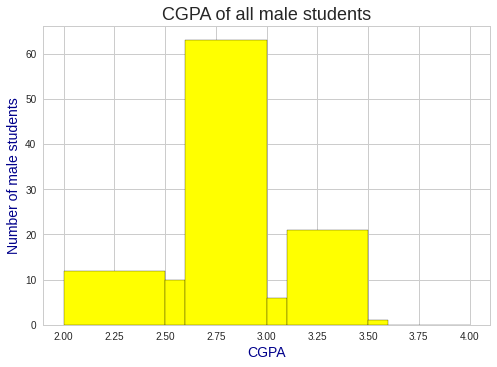

In [571]:
# Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.

maleData = data['CGPA'].where(data['Gender']=='Male')
a = maleData[~pd.isnull(maleData)]

plt.title("CGPA of all male students",fontsize=18)
plt.xlabel('CGPA',fontsize=14, color='darkblue')
plt.ylabel('Number of male students',fontsize=14,color='darkblue')
plt.hist(a, bins=[2.0, 2.5, 2.6, 3.0, 3.1, 3.5, 3.6, 4.0], color='yellow',edgecolor='black')


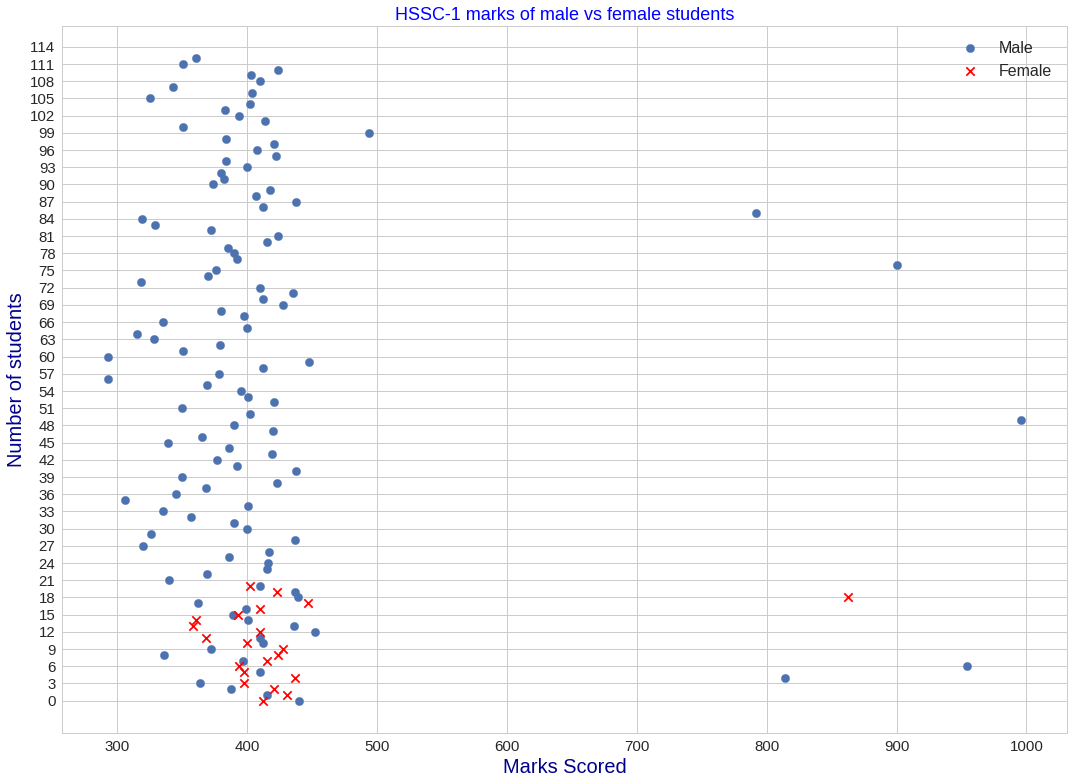

In [572]:
from matplotlib.mathtext import FontProperties
# Plot the HSSC-1 marks of all male vs female students on a scatter plot.

m = data['HSSC-1'].where(data['Gender']=='Male')
f = data['HSSC-1'].where(data['Gender']=='Female')

male_grades = m[~pd.isnull(m)]
female_grades = f[~pd.isnull(f)]

m_range = range(0,int(len(male_grades)))
f_range = range(0,int(len(female_grades)))

y_range= range(0,len(male_grades)+3,3)
plt.figure(figsize=(18,13))

plt.scatter(male_grades, m_range, s=70, marker='o',label='Male')
plt.scatter(female_grades, f_range, s=70, c='red', marker='x',label='Female')
plt.yticks(y_range,fontsize=15)
plt.xticks(fontsize=15)
plt.title('HSSC-1 marks of male vs female students',fontsize=18,color='blue')
plt.xlabel('Marks Scored', fontsize=20,color='darkblue')
plt.ylabel('Number of students', fontsize=20,color='darkblue')
plt.legend(loc='upper right',fontsize=16)

plt.show()

Text(0, 0.5, 'Number of Students')

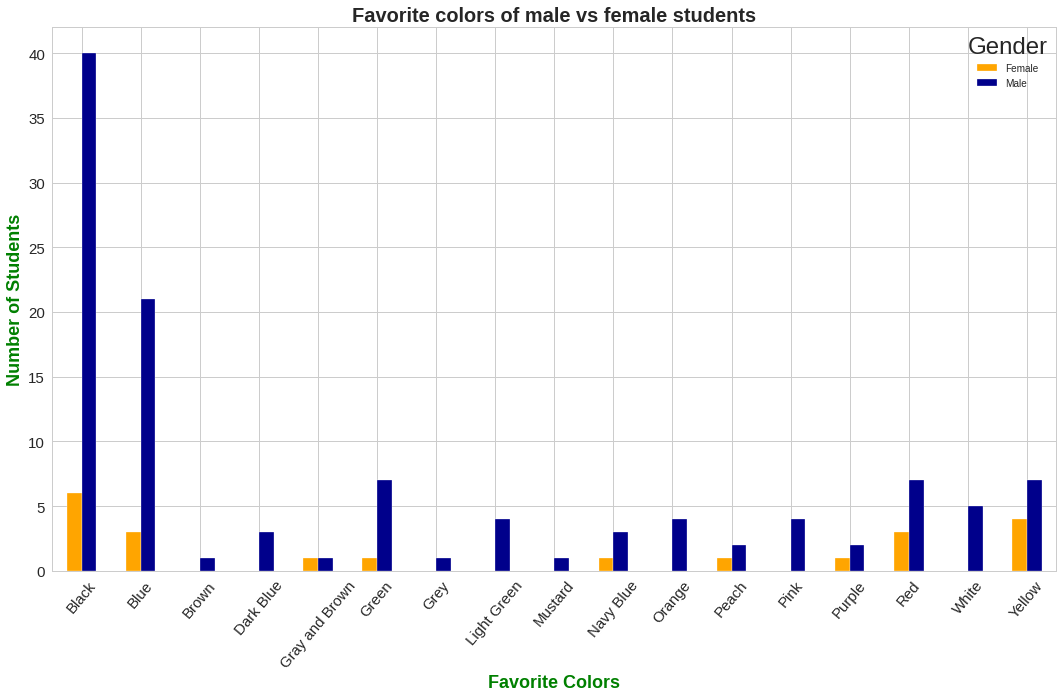

In [573]:
from operator import pos
# Plot the favorite colors of male vs female students on a bar chart.


gColumn = data['Gender']
data.groupby(["FavoriteColor", gColumn]).size().unstack(level=1).plot(kind='bar',fontsize= 15, figsize=(18, 10), color=['orange','darkblue'])
plt.title('Favorite colors of male vs female students', fontsize=20, fontweight='bold')
plt.xticks(rotation=50)
plt.xlabel('Favorite Colors', fontsize=18, fontweight='bold', color='green')
plt.ylabel('Number of Students', fontsize=18, fontweight='bold', color='green')


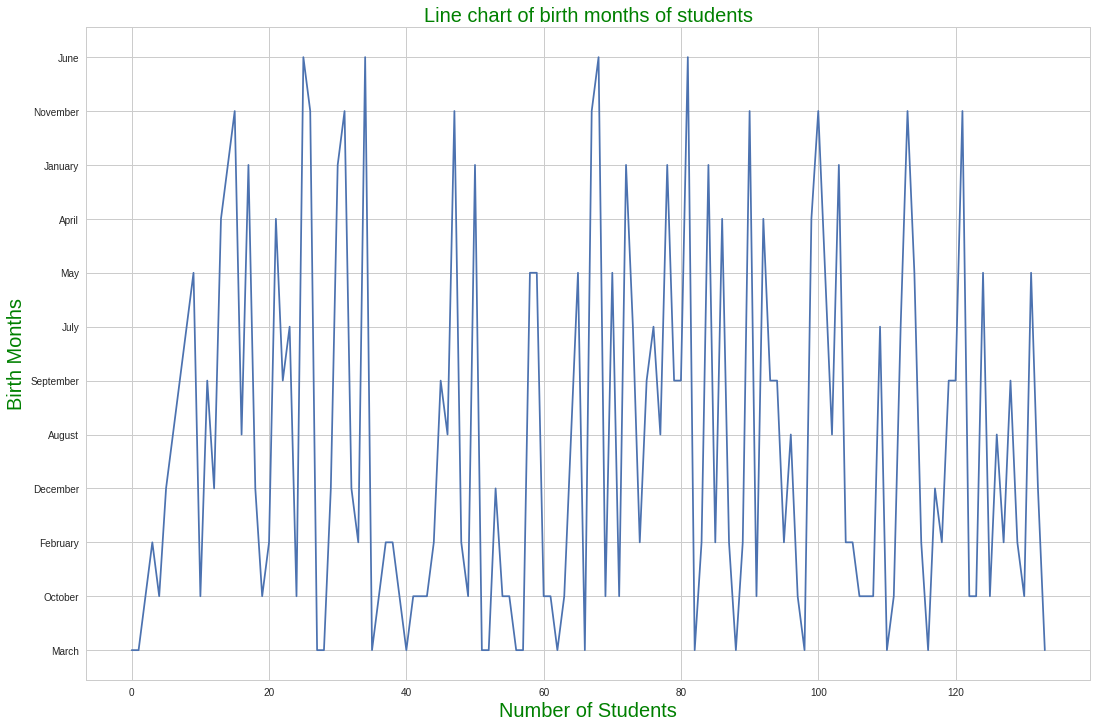

In [575]:
# Plot line chart of students and their birth months.

x = data['BirthMonth']
y = range(0, len(data))

plt.figure(figsize=(18,12))
plt.plot(y, x)
plt.title('Line chart of birth months of students', fontsize=20, color='green')
plt.xlabel('Number of Students', fontsize=20, color='green')
plt.ylabel('Birth Months', fontsize=20, color='green')
plt.show()


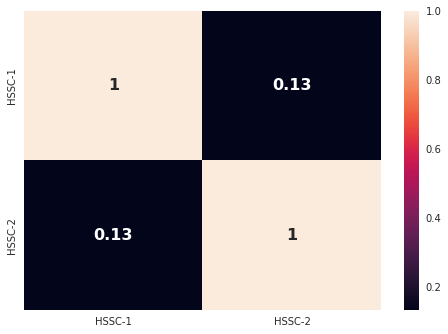

In [576]:
# Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

ds = data[['HSSC-1','HSSC-2']]

corr_matrix = ds.corr()
sn.heatmap(corr_matrix, annot=True, annot_kws={'fontsize': 16, 'fontweight': 'bold'})
sn.set(font_scale=2)
plt.show()


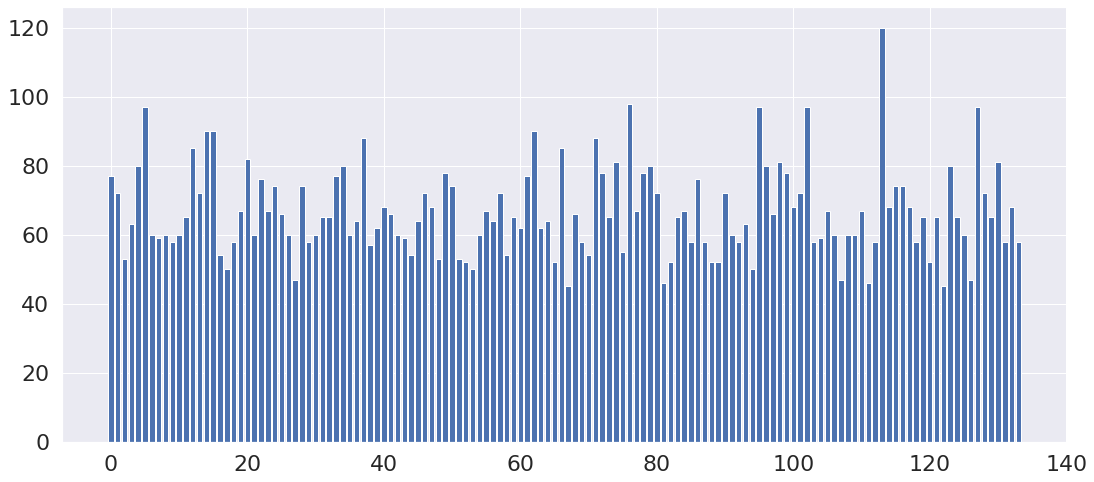

In [577]:
# Following are few insights we can get from the dataset!
# 1). we can plot a bar chart for the weights of students.
# 2). we can plot a scatter plot for the cgpa of all students to better visualize the performance of class.

y = data['Weight']
x = range(0,len(data))
plt.figure(figsize=(18,8))
plt.bar(x, y)
plt.show()

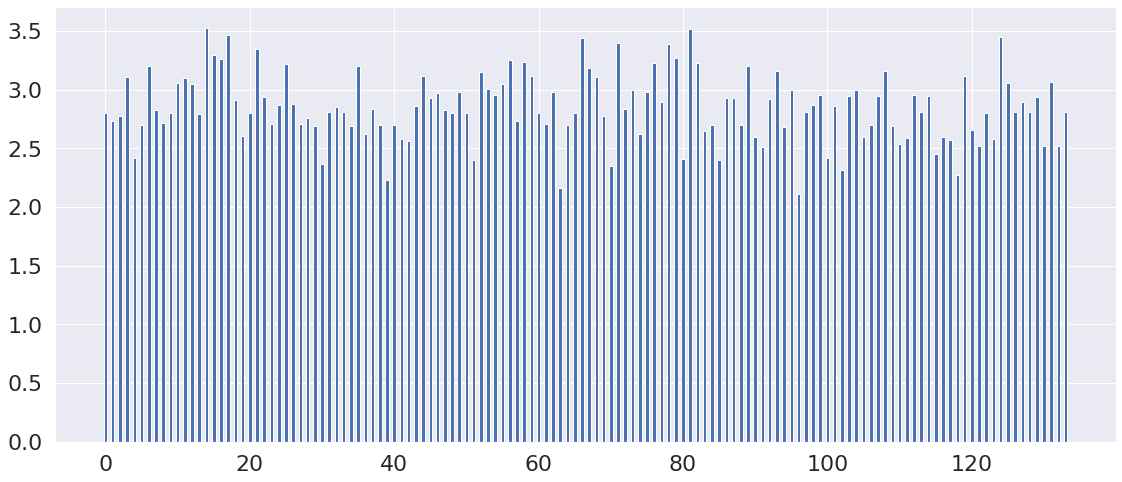

In [578]:
# 2). we can plot a bar chart for the cgpa of all students to better visualize the performance of class.


y = data['CGPA']
x = range(0,len(data))
plt.figure(figsize=(19,8))
plt.bar(x, y, 0.5, align='center',)
plt.show()
